In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size,1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) 
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) 
  return series[..., np.newaxis].astype(np.float32)

In [3]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_series(series, y=None, y_pred=None, x_label="$t$",y_label="$x(t)$"):
  plt.plot(series, ".-")
  if y is not None:
      plt.plot(n_steps, y, "bx", markersize=10)
  if y_pred is not None:
      plt.plot(n_steps, y_pred, "ro")
  plt.grid(True)
  if x_label:
    plt.xlabel(x_label, fontsize=16)
  if y_label:
    plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.hlines(0, 0, 100, linewidth=1)
  plt.axis([0, n_steps + 1, -1, 1])



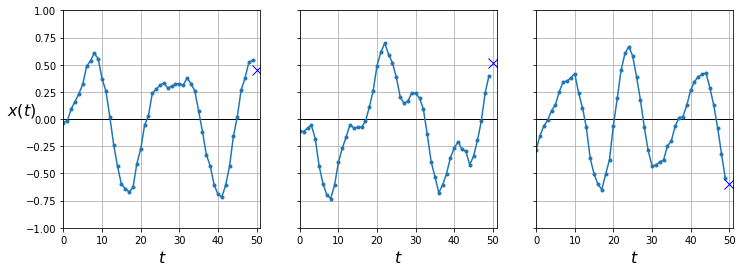

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
    y_label=("$x(t)$" if col==0 else None))
plt.show()

In [6]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020781139

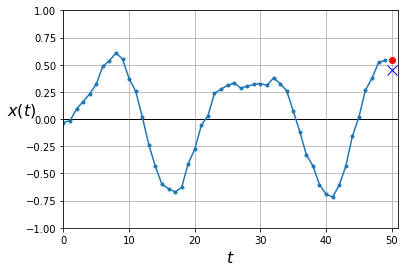

In [7]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [8]:
model = keras.models.Sequential([
keras.layers.SimpleRNN(1, input_shape=[None, 1])])
optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
model.evaluate(X_valid, y_valid)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


219/219 [==============================] - 3s 8ms/step - loss: 0.1127 - val_loss: 0.0404
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0326 - val_loss: 0.0270
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0234 - val_loss: 0.0207
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0186 - val_loss: 0.0170
Epoch 5/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0158 - val_loss: 0.0148
Epoch 6/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0140 - val_loss: 0.0133
Epoch 7/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0128 - val_loss: 0.0124
Epoch 8/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0121 - val_loss: 0.0118
Epoch 9/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0117 - val_loss: 0.0115
Epoch 10/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0115 - val_loss: 0.0113
Epoch 

0.011245157569646835

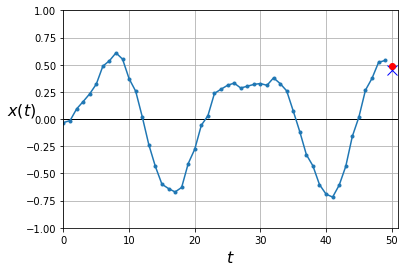

In [9]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()